In [12]:
### import library 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [13]:
### read data_frame

File_Name=os.path.join(os.getcwd(),'Weather Dataset.csv')
df=pd.read_csv(File_Name)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [14]:
### check null
df.isna().sum()
## there isn't nan

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [15]:
### drop duplicates
df.drop_duplicates(inplace=True,keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2521 entries, 0 to 3247
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            2521 non-null   object 
 1   Summary                   2521 non-null   object 
 2   Precip Type               2521 non-null   object 
 3   Temperature (C)           2521 non-null   float64
 4   Apparent Temperature (C)  2521 non-null   float64
 5   Humidity                  2521 non-null   float64
 6   Wind Speed (km/h)         2521 non-null   float64
 7   Wind Bearing (degrees)    2521 non-null   float64
 8   Visibility (km)           2521 non-null   float64
 9   Loud Cover                2521 non-null   float64
 10  Pressure (millibars)      2521 non-null   float64
 11  Daily Summary             2521 non-null   object 
dtypes: float64(8), object(4)
memory usage: 256.0+ KB


In [16]:
### to check unlogic data
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000
mean,9.344367,9.071731,0.014304,10.011831,201.519635,8.034247,-0.793336,994.984732
std,40.993225,9.926594,39.849472,5.962815,91.274419,40.266185,39.833051,151.674735
min,-2000.000000,-11.911111,-2000.000000,0.000000,0.000000,-2000.000000,-2000.000000,0.000000
25%,2.155556,-0.294444,0.710000,5.313000,146.000000,5.538400,0.000000,1010.780000
50%,10.577778,10.577778,0.860000,9.402400,198.000000,9.982000,0.000000,1015.180000
75%,17.150000,17.150000,0.930000,13.652800,280.000000,11.270000,0.000000,1023.520000
max,32.638889,35.494444,1.000000,36.386000,359.000000,16.100000,0.000000,1042.310000


In [17]:
## drop unlogic data
df = df[(df['Humidity'] >= 0) & (df['Humidity'] <= 1)]
df = df[df['Visibility (km)'] >= 0]
df = df[(df['Temperature (C)'] >= -50) & (df['Temperature (C)'] <= 50)]
df.drop(columns='Loud Cover',axis=1,inplace=True)# because all of elem is Zero



df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2518 entries, 0 to 2519
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            2518 non-null   object 
 1   Summary                   2518 non-null   object 
 2   Precip Type               2518 non-null   object 
 3   Temperature (C)           2518 non-null   float64
 4   Apparent Temperature (C)  2518 non-null   float64
 5   Humidity                  2518 non-null   float64
 6   Wind Speed (km/h)         2518 non-null   float64
 7   Wind Bearing (degrees)    2518 non-null   float64
 8   Visibility (km)           2518 non-null   float64
 9   Pressure (millibars)      2518 non-null   float64
 10  Daily Summary             2518 non-null   object 
dtypes: float64(7), object(4)
memory usage: 236.1+ KB


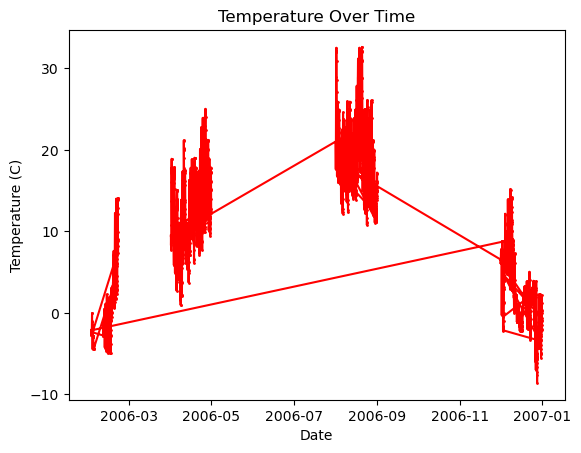

In [18]:
###  Plot temperature over time.
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)
plt.plot(df['Formatted Date'], df['Temperature (C)'], color='r',marker='o',markersize=1)
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Over Time')
plt.show()


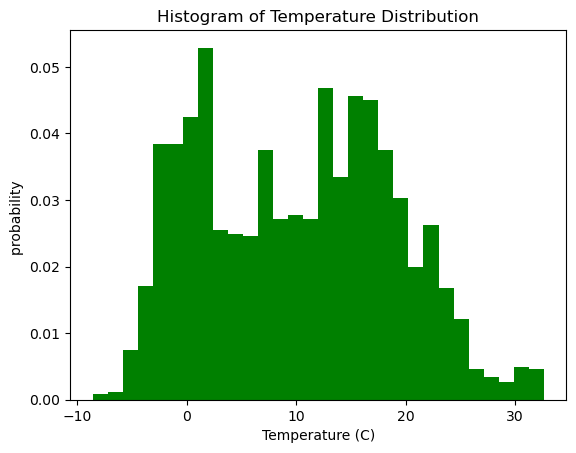

In [19]:
# Histogram of temperature distribution
plt.hist(df['Temperature (C)'], bins=30, color='green', density=True)
plt.xlabel('Temperature (C)')
plt.ylabel('probability ')
plt.title('Histogram of Temperature Distribution')
plt.show()


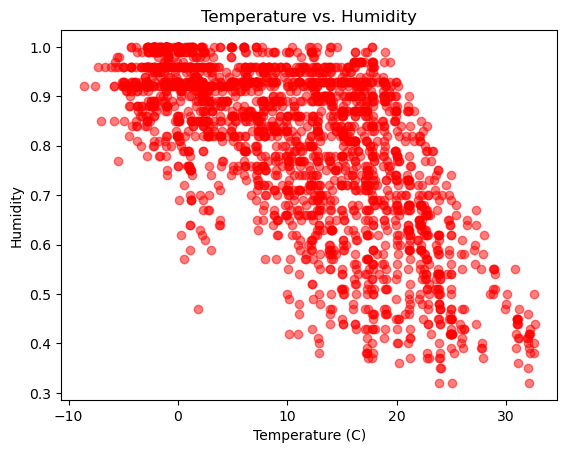

In [20]:
# Scatter plot of temperature vs. humidity
plt.scatter(df['Temperature (C)'], df['Humidity'], color='red', alpha=0.5)
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity')
plt.show()


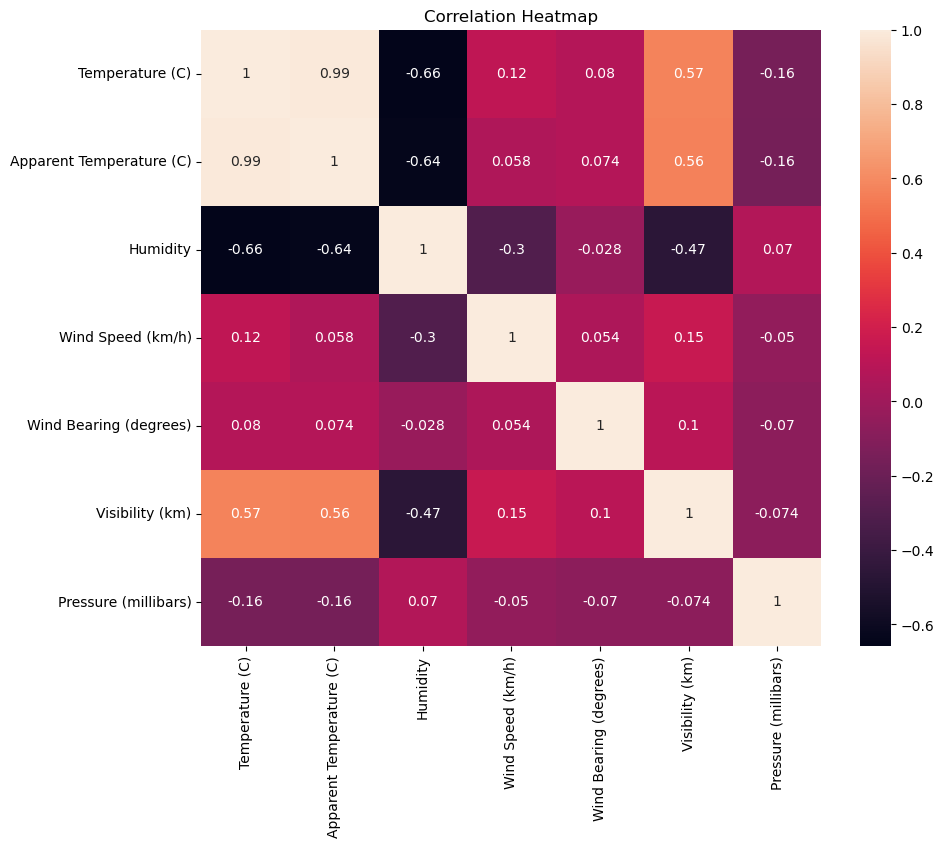

In [21]:
#a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap( df.select_dtypes(include=['number']).corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


Color Gradient:
Blue: Negative correlation (variables move in opposite directions).
Red: Positive correlation (variables move together).
White: No correlation (value of 0).

Values:
Range from -1 (perfect negative) to 1 (perfect positive).
Diagonal cells are always 1 (self-correlation).


Colorbar:
Indicates correlation values and their corresponding colors.
